# Customer Pricing Analysis - Monthly Subscription vs Per Lead

### Declare market and pricing variables

In [45]:
import datetime
import pandas as pd
pd.set_option('float_format', '{:f}'.format)

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

# Business evaluation start and end dates
start_date =  datetime.date(2018, 1, 1)
end_date = datetime.date(2020, 12, 31)

# Number of new construction communities by Jan 2018(start_date)?
cnt_communities_at_start = 6174

# Average number of leads received per community
avg_leads_at_start = 4.0

# Recommended pricing option per lead in $
per_lead_price = 40.0

# Recommended pricing per community/month in $
monthly_subs_price = 400.0

# Churn rate or community subscription
commn_churn_rate = 0.90

# Expected Month-Over-Month leads per community, communities count growth rate
mom_exp_growth = {
    2018: {
        "mom_growth_leads": 0.05,
        "mom_growth_commn": 0.06
    },
    2019: {
        "mom_growth_leads": 0.04,
        "mom_growth_commn": 0.04
    },
    2020: {
        "mom_growth_leads": 0.01,
        "mom_growth_commn": 0.02
    }
}

### Generate expected market growth for each business model.

* Per Community/Month model
* Per Lead model

In [46]:
# Declare a dataframe to calculate the business and revenue made through each model
df_pricing_eval = pd.DataFrame(columns=[
                                        'date', 
                                        'community_count', 
                                        'communities_subscribed',
                                        'community_model_revenue',
                                        'avg_leads_count',
                                        'total_leads_generated',
                                        'lead_model_revenue'
                                       ])

# Generate a series of month dates within a range.
business_date_ranges = pd.date_range(start_date, end_date, freq='MS')
df_pricing_eval['date'] = business_date_ranges

# communities that we are operating
var_commn = cnt_communities_at_start

# communities that are subscribed
var_commn_subs = cnt_communities_at_start 

# intial revenue by community subscription
var_commn_revenue = var_commn * monthly_subs_price

# average leads per community
var_leads = avg_leads_at_start

# total leads generated in the starting month
var_total_leads = cnt_communities_at_start * avg_leads_at_start 

# initial revenue genrated selling leads to each community
var_leads_revenue = avg_leads_at_start * per_lead_price * var_commn 

# calculate and assign data to pricing_eval dataframe
for index, row in df_pricing_eval.iterrows():

    if index >= 1:
        
        # mom community growth rate in the year
        mom_commun_growth_rate = mom_exp_growth[row['date'].year]["mom_growth_commn"]
        
        # mom leads per community growth rate in the year
        mom_commn_leads_growth_rate = mom_exp_growth[row['date'].year]["mom_growth_leads"]
        
        # calcute the communities engaged with Zillow over years incrementally
        var_commn += var_commn * mom_commun_growth_rate
        
        # calculate the community subscriptions & revenue over years incrementally
        var_commn_subs += var_commn_subs * mom_commun_growth_rate * commn_churn_rate
        var_commn_revenue = var_commn_subs * monthly_subs_price
        
        # calculate the communities registered for per-lead model and expected revenue over years incrementally
        var_leads += var_leads * mom_commn_leads_growth_rate
        var_total_leads = var_leads * var_commn
        var_leads_revenue = var_leads * per_lead_price * var_commn
        
    # assign values to the dataframe for evaluation
    df_pricing_eval.loc[index, ['community_count', 'communities_subscribed', 'community_model_revenue', 'avg_leads_count', 'total_leads_generated', 'lead_model_revenue']] = [var_commn, var_commn_subs, var_commn_revenue, var_leads, var_total_leads, var_leads_revenue]

df_pricing_eval

,date,community_count,communities_subscribed,community_model_revenue,avg_leads_count,total_leads_generated,lead_model_revenue
0,2018-01-01,6174,6174,2469600.000000,4.000000,24696.000000,987840.000000
1,2018-02-01,6544.440000,6507.396000,2602958.400000,4.200000,27486.648000,1099465.920000
2,2018-03-01,6937.106400,6858.795384,2743518.153600,4.410000,30592.639224,1223705.568960
3,2018-04-01,7353.332784,7229.170335,2891668.133894,4.630500,34049.607456,1361984.298252
4,2018-05-01,7794.532751,7619.545533,3047818.213125,4.862025,37897.213099,1515888.523955
5,2018-06-01,8262.204716,8031.000992,3212400.396633,5.105126,42179.598179,1687183.927162
6,2018-07-01,8757.936999,8464.675045,3385870.018052,5.360383,46945.892773,1877835.710931
7,2018-08-01,9283.413219,8921.767498,3568706.999026,5.628402,52250.778657,2090031.146266
8,2018-09-01,9840.418012,9403.542942,3761417.176974,5.909822,58155.116645,2326204.665795
9,2018-10-01,10430.843093,9911.334261,3964533.704530,6.205313,64726.644826,2589065.793029


### How many communites does each model result in December 2020?


Expected "Per Lead Model" Percentage growth from 2018-2020: 285.45% (17623.61 Communities)

Expected "Per Community Model" Percentage growth from 2018-2020: 237.70% (14675.89 Communities)



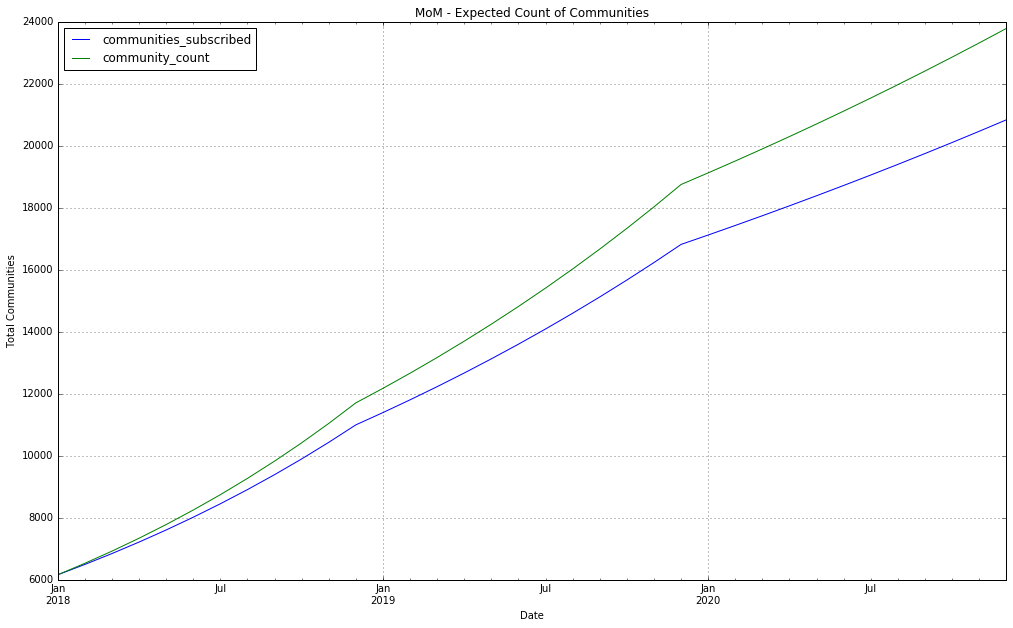

In [48]:
# print "Per Lead Model": expected communities growth
perlead_communities_start = df_pricing_eval[df_pricing_eval.date == '2018-01-01']['community_count'].values[0]
perlead_communities_end = df_pricing_eval[df_pricing_eval.date == '2020-12-01']['community_count'].values[0]

perlead_communities_growth = perlead_communities_end - perlead_communities_start
perlead_model_growth_percent = (perlead_communities_growth/ perlead_communities_start)*100

print('\nExpected "Per Lead Model" Percentage growth from 2018-2020: {:.2f}% ({:.2f} Communities)'.format(perlead_model_growth_percent, perlead_communities_growth))

# print "Per Community Model": expected communities growth
communities_subscribed_start = df_pricing_eval[df_pricing_eval.date == '2018-01-01']['communities_subscribed'].values[0]
communities_subscribed_end = df_pricing_eval[df_pricing_eval.date == '2020-12-01']['communities_subscribed'].values[0]

communities_subscription_growth = communities_subscribed_end - communities_subscribed_start
percommunity_model_growth_percent = (communities_subscription_growth/communities_subscribed_start)*100

print('\nExpected "Per Community Model" Percentage growth from 2018-2020: {:.2f}% ({:.2f} Communities)\n'.format(percommunity_model_growth_percent, communities_subscription_growth))


df_pricing_eval.plot(x='date', y=['communities_subscribed', 'community_count'], figsize=(17, 10), grid=True)
plt.title('MoM - Expected Count of Communities')
plt.xlabel('Date')
plt.ylabel('Total Communities')
plt.show()

### What is the overall revenue impact?


Expected "Per Lead Model" Percentage Revenue growth from 2018-2020: 1089.34% (10760921.97 in $)

Expected "Per Community Model" Percentage Revenue growth from 2018-2020: 237.70% (5870355.57 in $)



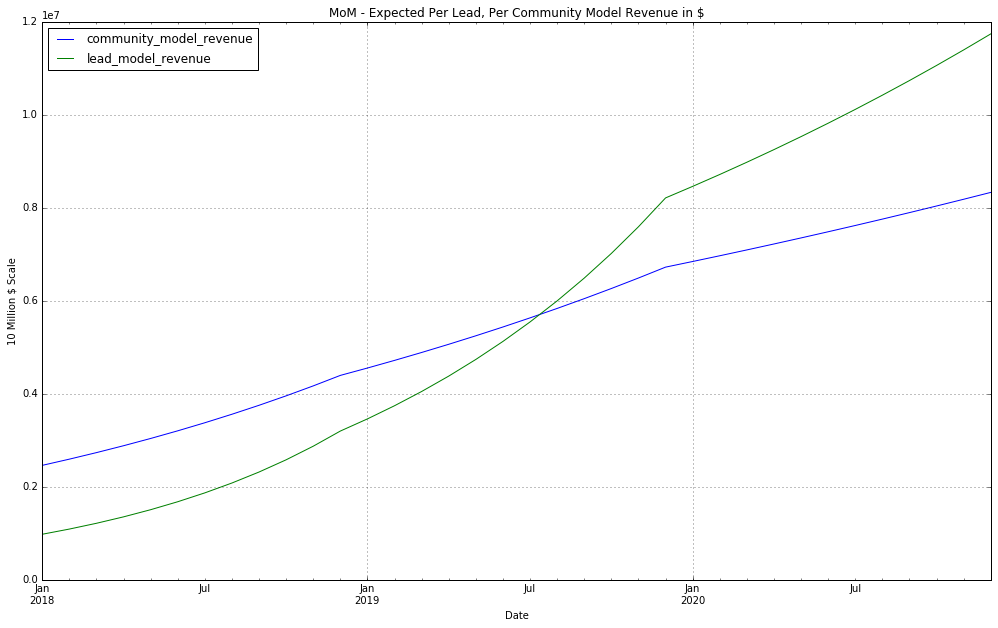

In [29]:
# print "Per Lead Model": expected revenue growth
perlead_revenue_start = df_pricing_eval[df_pricing_eval.date == '2018-01-01']['lead_model_revenue'].values[0]
perlead_revenue_end = df_pricing_eval[df_pricing_eval.date == '2020-12-01']['lead_model_revenue'].values[0]

perlead_revenue_growth = perlead_revenue_end - perlead_revenue_start
perlead_revenue_growth_percent = (perlead_revenue_growth/ perlead_revenue_start)*100

print('\nExpected "Per Lead Model" Percentage Revenue growth from 2018-2020: {:.2f}% ({:.2f} in $)'.format(perlead_revenue_growth_percent, perlead_revenue_growth))


# print "Per Community Model": expected communities growth
subscription_revenue_start = df_pricing_eval[df_pricing_eval.date == '2018-01-01']['community_model_revenue'].values[0]
subscription_revenue_end = df_pricing_eval[df_pricing_eval.date == '2020-12-01']['community_model_revenue'].values[0]

subscription_revenue_growth = subscription_revenue_end - subscription_revenue_start
subscription_revenue_growth_percent = (subscription_revenue_growth/subscription_revenue_start)*100

print('\nExpected "Per Community Model" Percentage Revenue growth from 2018-2020: {:.2f}% ({:.2f} in $)\n'.format(subscription_revenue_growth_percent, subscription_revenue_growth))


# plot revenue trend across two models
df_pricing_eval.plot(x='date', y=['community_model_revenue', 'lead_model_revenue'], figsize=(17,10), grid=True)
plt.title('MoM - Expected Per Lead, Per Community Model Revenue in $')
plt.xlabel('Date')
plt.ylabel('10 Million $ Scale')
plt.show()

#### Sum of leads per community in 2018, 2020

In [50]:
avg_annual_leads_per_community_2018 = df_pricing_eval[(df_pricing_eval.date >= '2018-01-01') & (df_pricing_eval.date <= '2018-12-01')].avg_leads_count.sum()
print('2018 - Avg annual leads per community: {:.2f}'.format(avg_annual_leads_per_community_2018))

zillow_lead_conversion_rate = 0.04
zillow_expected_closing_annually_2018 = avg_annual_leads_per_community_2018 * zillow_lead_conversion_rate
print ('2018 - Expected closings from annual zillow subscribed leads: {:.2f}'.format(zillow_expected_closing_annually_2018))

print ('\n')

avg_annual_leads_per_community_2020 = df_pricing_eval[(df_pricing_eval.date >= '2020-01-01') & (df_pricing_eval.date <= '2020-12-01')].avg_leads_count.sum()
print('2020 - Avg annual leads per community: {:.2f}'.format(avg_annual_leads_per_community_2020))

zillow_lead_conversion_rate = 0.04
zillow_expected_closing_annually_2020 = avg_annual_leads_per_community_2020 * zillow_lead_conversion_rate
print ('2020 - Expected closings from annual zillow subscribed leads: {:.2f}'.format(zillow_expected_closing_annually_2020))

2018 - Avg annual leads per community: 63.67
2018 - Expected closings from annual zillow subscribed leads: 2.55


2020 - Avg annual leads per community: 140.30
2020 - Expected closings from annual zillow subscribed leads: 5.61


### Check Price Elasticity

We want to check for the price elasticity for each model. Price elasticity is the ratio of % change in quantity and % change in price.

In [53]:
df_demand_curve = df_pricing_eval
df_demand_curve.head()
df_demand_curve['price_per_lead_in_subscription'] = 400 / df_demand_curve['avg_leads_count']
df_demand_curve['price_per_lead_in_per_lead_model'] = 40
df_demand_curve = df_demand_curve[['date', 'community_count', 'communities_subscribed', 'price_per_lead_in_subscription', 'price_per_lead_in_per_lead_model']]
df_demand_curve.head()

,date,community_count,communities_subscribed,price_per_lead_in_subscription,price_per_lead_in_per_lead_model
0,2018-01-01,6174,6174,100.000000,40
1,2018-02-01,6544.440000,6507.396000,95.238095,40
2,2018-03-01,6937.106400,6858.795384,90.702948,40
3,2018-04-01,7353.332784,7229.170335,86.383760,40
4,2018-05-01,7794.532751,7619.545533,82.270247,40


### Identify the relation between Communities enrolled(Demand) and price per lead(Price)

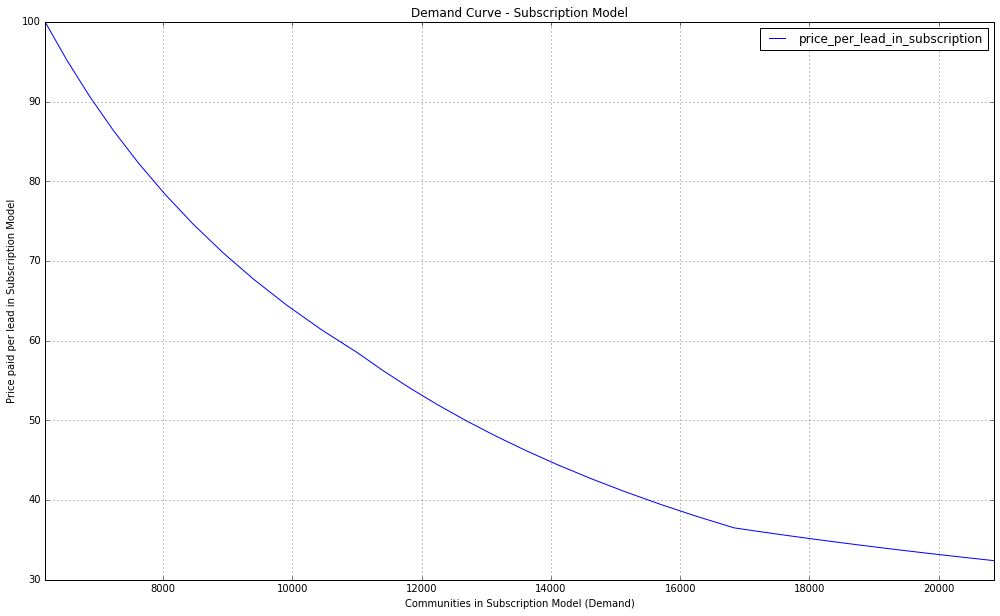

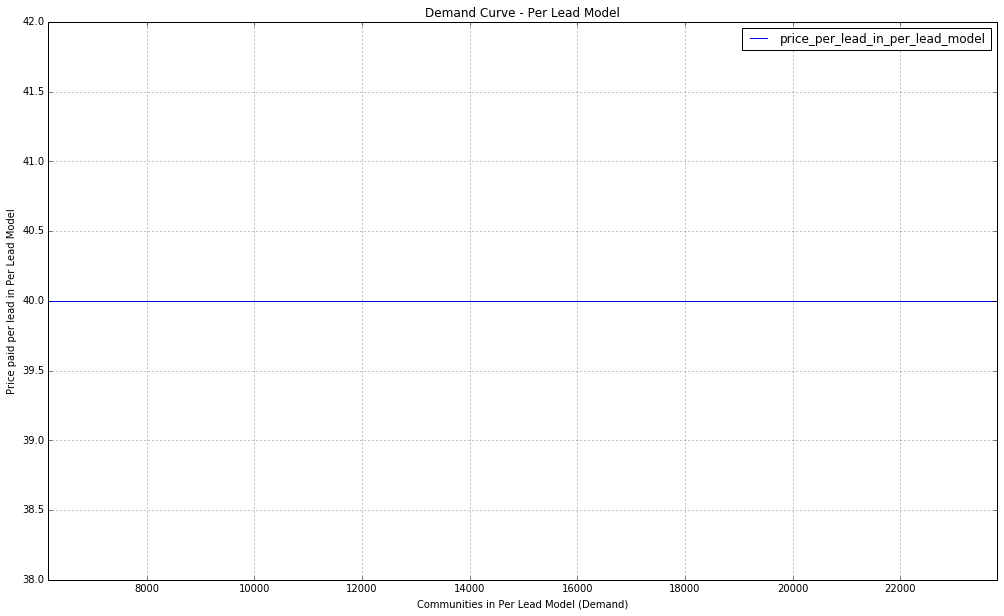

In [52]:
# plot revenue trend across two models
df_demand_curve.plot(x='communities_subscribed', y='price_per_lead_in_subscription', figsize=(17,10), grid=True)
plt.title('Demand Curve - Subscription Model')
plt.xlabel('Communities in Subscription Model (Demand)')
plt.ylabel('Price paid per lead in Subscription Model')
plt.show()

# plot revenue trend across two models
df_demand_curve.plot(x='community_count', y='price_per_lead_in_per_lead_model', figsize=(17,10), grid=True)
plt.title('Demand Curve - Per Lead Model')
plt.xlabel('Communities in Per Lead Model (Demand)')
plt.ylabel('Price paid per lead in Per Lead Model')
plt.show()

---
### What strategic advantages do you believe each plan provides? What are the drawbacks of each?

#### Advantages to the business

##### Per community/month

* No prior promise to deliver N leads per month.
* Revenue model is not directly dependent on leads generated.
* Generate more revenue in-spite of low lead generation.
* Markets leaders with better lead quality and supporting services can sustain in this model in adverse market conditions due to overall value they provide.

##### Per lead model 

* More customers would like to try the product. 
* More flexibility - Control of commodity in both ends.
* Better screened leads can be marketed at better price.
* Low customer churn
* More revenue in long term.

#### Drawbacks to the Business

##### Per community/month

* Challenges to reduce customer churn.
* More efforts for sales team to on-board new communities.
* May loose profit by providing more value for money in good real-estate markets.

##### Per lead model 

* More efforts towards attracting customer to generate desired amount of leads.
* Revenue model is greatly dependent on leads generated. Therefore depends on website availability, user experience etc.
* Giving a better chance to customer to try other products alongside and chances to lose business. 

---

#### Advantages to the Customer

##### Per community/month

* Agent will receive more value from the year 2020 onwards (<$40 per lead).
* Scope for less decision making towards volume of leads to purchase every month.

##### Per lead model 

* More flexibility - Can purchase the volume of leads based on his experience with Zillow.
* Can avoid overpayment if not sure of the service/value.


#### Drawbacks to the Customer

##### Per community/month

* Low Trust - Agent don’t know what he gets exactly.
* Paying more for less value initially from 2018-2019 ending.
* Irrespective of agent’s occupancy, he needs to focus on the leads to realize a value for his subscription.
* Agents are given no alternative pricing(reduced) in areas with low lead generation/demand.

##### Per lead model 

* Frequently need to make a decision to buy N number of leads or not.
* End up paying more amount than monthly subscribers due to more lead volume from Oct 2019.

---

### Opportunities

Per lead pricing can be modelled using:
* Estimated house price using in-house price estimation tools like Zestimate.
* Understand hotness of the lead based on the geography. 
* Information like Census, neighbourhood data, nearby school ratings,  crime rate helps us in modeling the importance of the lead.
* Understanding the profile of the customer who submitted the lead. Third party companies provided socio-economic indicators of the household who submitted the lead. 

Demand curve can be developed over sequence of pricing decisions and demand recorded over years. We can try to represent this using a linear or quadratic expression and try to model the scenario to maximize the profit.

### Concerns

* 4 leads per month here is a very small number. So, some profit equations may seem unreliable.
* Flat amount of leads per month and growth is unrealistic across all communities. 
* We are not considering here any seasonal or economic factors like recession into consideration for pricing.
* Also, area/real-estate market based pricing approach works better.
* Understanding competitors offering is important to choose the model.

---

### Recommendation

Over emphasis on customer satisfaction and long-term revenue, choosing <b> “Pay per lead” </b> will be a better strategy. 

In 2018/2019 with fierce competition in lead generations using real-estate advertising websites and social media platforms like Facebook, Instagram it is important to display customer centric initiatives like pricing and product value and thus gradually increasing market penetration.

I see a benefit with this model for these aspects:

* We are allowing more customers to use our product.
* Building a trust factor by charging for usage only.
* Giving the user flexibility to scale depending on his resources.
* Expected long term projected revenue growth rate is higher.
* Registers low/no churn rate, so less sales and promotional efforts.


### References

https://www.zillow.com/agent-resources/blog/how-do-real-estate-agents-get-paid/
https://www.joinreal.com/blog/are-zillow-leads-worth-the-money